# データマイニング概観

## 概要
データの山を採掘することで「データの中に埋め込まれている(有用な)知識を発掘」する。本資料では用語の定義や関連事例・技術を概観しつつ、発掘する際の問題意識を眺める。また本授業で扱う部分を示す。

### 今日の達成目標
- データセットからパターンを見つける際の問題意識に触れる。（理解は後日で良い）
- 本授業で扱う範囲を確認し、履修判断のために用いる。

## 背景
データから有益な知識を発掘したいという問題意識は古くからあるが、コンピュータが広まる前はそもそもデータの蓄積自体が困難だったり、蓄積できるようになってきても十分な計算機パワーがなかった。例えば、2000年頃はまだスマートフォンもなく、個々人が動画を撮影してSNSで共有する、、、といったことはなく、そういう個人用途のデータはまだまだデータとして集まっていなかった。これに対し今では、様々なデータが蓄積され続け、そのスピードは増す一方である。

### データとは

>**[データとは？]**
>
>[Wikipedia: data](https://en.wikipedia.org/wiki/Data)によると以下の通り。
>
>``Data are characteristics or information, usually numerical, that are collected through observation.[1] In a more technical sense, data are a set of values of qualitative or quantitative variables about one or more persons or objects, while a datum (singular of data) is a single value of a single variable.[2]``

現場における **データ（data）** は、**質的**にも**量的**にも変数化・値化されていなかったり、どこかに一箇所（DB等）にまとまっていないことも少なくない。整理されていないデータのことを **生データ（raw data）** と呼ぶことにしよう。授業では、基本的には「データ（既に質的もしくは量的に変数化されているもの）」を対象とする。


### データマイニングとは

一言で言えば、大量のデータの中にある **頻出パターンや意味のある構造を発見** することである。とはいえ知ってる知識が得られるだけでは嬉しくない。新しく、再利用可能な知識（useful new knowledge）を得たい。これを別の言葉で言い換えると例えば以下のようなタスク例となる。
- 「殆どの人間が当たり前にできること」をコンピュータにさせたい。
    - 画像に写っているのは動物か否か？（識別タスク）
    - ある事件について報道している記事はどれか？（分類タスク、クラスタリング、トピック抽出）
- 「場合によっては専門家でも難しいタスク」をコンピュータにさせたい。
    - 売上向上のために取り組むべきアクションは何か？（相関ルール、クラスタリング、推薦、理由説明）
    - 新しい化学反応は無いだろうか？, [ロボットが機械学習で新しい化学反応を発見：機械学習で有機合成ロボットを制御して反応性を探索する研究](https://marvin.news/4303)（生成タスク）
    - 放射線科医が行っていた医療画像からの読影をサポートできないか？, [画像診断と機械学習そしてDeep Learning ReconstructionによるMRI画像にあたえるインパクト](https://www.innervision.co.jp/sp/ad/suite/canonmedical/seminarreport/garon2018_mri)（キャンセル可能性推測、短時間撮影、ノイズ低減、ポジショニング最適化、、）
    - リモートからの不正なアクセスを見抜けないか？（識別タスク、外れ値検出）

### 演習
1. 質的データの例を挙げよ。
2. 量的データの例を挙げよ。
3. 「殆どの人間が当たり前にできること」の例を挙げよ。
4. 「場合によっては専門家でも難しいタスク」の例を挙げよ。

## 関連技術と問題意識

### データベースとデータウェアハウス
> **[データベースとは？]**
>
> [Wikipedia: データベース](https://ja.wikipedia.org/wiki/データベース)によると、、
>
> データベース（英: database, DB）とは、検索や蓄積が容易にできるよう整理された情報の集まり。 通常はコンピュータによって実現されたものを指す。コンピュータを使用したデータベース・システムでは、データベース管理用のソフトウェアであるデータベース管理システムを使用する場合も多い。プログラムで扱うデータ構造やデータそのものを独自実装の場合に比べて少ない工数で操作できるようにしている。

データベースやデータウェアハウスを利用することで大規模に対する高速な処理を実現できるだけでなく、共通アクセス方法の提供、データ共有、バックアップといった多様な運用・保守管理上のメリットがある。

これに対して本授業ではデータベースは触らず、CSV/TSV/[ARFF](https://waikato.github.io/weka-wiki/formats_and_processing/arff_stable/)等のテキストファイルとしてデータを用意し、それを読み込んで利用することを想定する。

### 教務情報を例にデータ種別を眺めてみよう
例えば琉大では[教務情報システム](http://rais.skr.u-ryukyu.ac.jp/dc/)にログインすると、学生は自身の過去の成績を参照したり、現在履修中の講義やシラバス、お知らせを確認することができる。これらは代表的な構造化データであり、表形式で表されるレコードやトランザクションの例である。成績は例えば以下のように構成されている。

| (レコード識別子) | 科目番号 | 科目 | 単位 | 評価 | 修得年度 |
| ---: | --- | --- | --- | --- | --- |
| 1 |工共114|プログラミングI|2|F|2019年度 前期|
| 2 |工共114|プログラミングI|2|C|2020年度 前期|
| 3 |工共214|プログラミング演習I|2|B|2020年度 前期|
| 4 |知能984|データマイニング|2|A|2021年度 前期|

「特定個人の成績」という観点からは、各データは「レコード識別子・科目番号・科目・単位・評価・修得年度の6つの**属性（attribute）**」で構成される**レコード（record）** の集合として表現される。上記ではレコード識別子1〜4の4件のレコードが列挙されている。レコード識別子はシステムの都合上付けることが多いものであり、例えば「プログラミングIを複数回受講しているがこれらを別データとして区別して保存したい」場合には各データを区別して記録する必要がある。これを区別（識別）するためにユニークな値を用意したものをレコード識別子と呼ぶ。

また、識別子以外の主要な属性がアイテムである時、例えば「2020年度 前期」に修得した科目名「プログラミングI, プログラミング演習I」という集合を**トランザクション（transaction）** と呼ぶ。別例を上げると、コンビニで各商品に付けられている価格やメーカー名等がレコードであり、ある顧客が一度の会計処理で購入した商品群（1件でも良い）がトランザクションである。レコードやトランザクションは[データベース](https://ja.wikipedia.org/wiki/データベース)における最も基礎となる概念である。

レコードは複数の属性で表される一つのデータのことであり、各属性は**カテゴリカル属性（categorical）・量的属性（quantitative）・数値型属性（numerical）** に分けられる。更にカテゴリカル属性は、単に互いを区別できれば良い**名義属性（nominal）** と、**順序関係が成り立つ属性（ordinal）** とに分けられる。データの捉え方は他にもあり、例えば数値型属性を**実数（連続値）と自然数（離散値）** とで区分する考え方や、割合や濃淡といった**濃度**で区分することもある。

なお、属性のことを機械学習の分野では **特徴もしくは特徴量（feature）** と呼ぶことが多い。本授業では特徴と呼ぶこととする。同様にレコードのことを **サンプル（sample）** と呼ぶこととする。

### 卒業要件を例に複数数値データを眺めてみよう
知能情報コースにおける卒業要件を例に取ると、各科目は「共通教育、専門基礎科目、専門科目」に大別される。仮に各項目における評価をGPAにより求めるとするならば、各学生を3つの評価軸で構成されたベクトル空間上にプロットすることができるだろう。

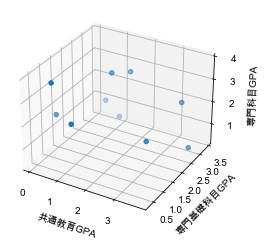

In [1]:
# 10人分の仮想成績を乱数で生成
import numpy as np
student_num = 10
scores = []
for _i in range(student_num):
    score = np.round(np.random.random(3)*4, 2)
    scores.append(score)
scores = np.array(scores)

# 3次元描画
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import matplotlib.font_manager as font_manager
#TTFファイル(フォント)のアドレスを指定
font_path = '/Library/Fonts/Arial Unicode.ttf'
#フォントの詳細情報を取得
font_prop = font_manager.FontProperties(fname = font_path)
#フォントの名前を使い、matplotのデフォルトフォントに指定
matplotlib.rcParams['font.family'] = font_prop.get_name()

x = scores[:,0]
y = scores[:,1]
z = scores[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z)
ax.set_xlabel("共通教育GPA")
ax.set_ylabel("専門基礎科目GPA")
ax.set_zlabel("専門科目GPA")
plt.show()

より一般的には、データセットを構成するレコードが複数の数値データを含む場合、そのレコードは **多次元空間** 上の点としてみなすことができる。属性数が3種類までなら3次元空間として描画可能だが、4属性以上になると直接的な描画は困難となる。このような場合には属性数そのものを取捨選択する[特徴選択](https://ja.wikipedia.org/wiki/特徴選択)や、主成分分析に代表される[次元削減](https://en.wikipedia.org/wiki/Dimensionality_reduction)により属性数を絞り込むことがよく行われる。

### 血液検査を例に考えてみよう
[日本予防医学協会の説明](https://www.jpm1960.org/exam/exam06.html)に検査項目ごとの基準値が示されている。例えばASTは0〜40U/L、総コレステロールは130〜219mg/dL、HbA1cは4.6〜5.5%といった具合だ。数値で表されている項目に限定すると、すべての項目が数値で表されているため、多次元空間上の点としてプロット可能である。実際、特徴選択や次元削減等を通してプロットすることで貧血や肝臓の異常といった病気傾向に属する人を見つけやすくなるだろう。

その一方で、属性ごとの値の意味や高低の基準は不揃いである。このため「HbA1cが低い人」と言われてもそれがどのぐらいの値を指すのかは各基準を参照しないとわからない。そのため[日本予防医学協会の説明](https://www.jpm1960.org/exam/exam06.html)には項目ごとに基準値が示されている。例えば総コレステロールが1ポイント上がった場合と、HbA1cが1ポイント上がった場合とでは全く意味合いが異なる。このように数量的に意味合いや度合いが異なる特徴量を上手く取り扱うための前処理は **スケーリング（scaling）** と呼ばれており、特に **正規化（normalization）** や **標準化（standalization）** が良く用いられる。

スケーリングの効果は[ワインの分類](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)の例を眺めてみるとイメージしやすいだろう。[ワインデータセット](https://archive.ics.uci.edu/ml/datasets/wine)は同じ地域で栽培されたぶどうから作った異なる3種類のワインがあり、それを識別するためにアルコール度数・アミノ酸・フェノール等13種の特徴量が用意されている。スケーリング前のデータで分類学習すると約81%の精度となり、それをPCAで2次元描画したものが左図である。これに対しスケーリング後の精度は約98%であり、右図の通り直感的にも分類しやすい場所に各サンプルがうまく散らばっていることを目視できる。

### カテゴリカル属性のデータはどのように扱えば良いのだろう？
数値データであれば、[ユークリッド距離](https://ja.wikipedia.org/wiki/ユークリッド距離)等を用いることで距離を計測することができる。距離がわかるなら、各サンプルがどれだけ近いのか（≒似ているのか）を判断することができる。距離（距離空間）を利用したいからこそ、特徴ベクトルを数値データで記述している。

カテゴリデータの場合、例えばニュース記事のジャンルとして「政治」と「スポーツ」があったとき、それらの距離はどう測ればよいだろうか？　データセットとして「1つ目の記事（サンプル）は政治に関する記事である」「2つ目の記事はスポーツに関する記事である」という関連情報を何とかして機械的に処理しやすい数値に置き換えて処理したい。このとき、例えば政治を1、スポーツを2として単純に数値を割り当てて問題はないのだろうか。言い換えると「政治とスポーツの距離は1」という演算結果は妥当だろうか。現実的には **One-Hot表現（One-Hot encoding）** によりベクトル表現することが多い。

### 自然言語で記述された文章はどのように扱えばよいのだろう？
自然言語（私たちが普段使っている言葉）をコンピュータに理解させるための処理。ここでいう理解とは、特定タスクの達成に寄与すること全般を指す。例えば、ある映画レビューがポジティブに評価しているのか、ネガティブに評価しているのかを文章から判断することができれば、このタスクにおいては理解しているとみなすとしよう。タスクの例としては以下のようなものがある。

- 記事分類: [自動記事分類技術を用いた「日経テレコンナビ型記事検索」　情報収集に気づきを提供する新スタイル](https://www.jstage.jst.go.jp/article/johokanri/57/12/57_900/_article/-char/ja/)
    - 「利用者が思いついたキーワードを起点として、検索された結果を複数の観点で自動的に分類し、利用者が求めている情報（検索結果）にたどり着くことができるようになっている。」
- レビュー分析: [絵本レビューを情報源とする子どもの認知発達的反応の収集・類型化とそれに基づく絵本の分類](https://www.jstage.jst.go.jp/article/jsoft/30/3/30_581/_article/-char/ja/)
    - 「本論文で情報源とする絵本レビューサイトにおいては、実際に絵本の読み聞かせを行った養育者や保育者が、絵本の読み聞かせを行った際の様子や絵本への感想、絵本に対する子供の反応の有無やその反応の様子など、多岐多様な情報を記載している。」
- 極性判定: [Twitterを対象とした評価極性判定システムの構築](https://www.jstage.jst.go.jp/article/pjsai/JSAI2013/0/JSAI2013_1F41in/_article/-char/ja/)
    - 「（中略）ある対象に関する評価を含むツイートを収集し、評価対象・属性・評価後の3つ組を抽出し、ツイートの評価極性を判定することによりその実現を試みる。」
- クラスタリング: [テキストマイニングによる食レポ口コミからのユーザー嗜好モデリング](https://akita-pu.repo.nii.ac.jp/?action=pages_view_main&active_action=repository_view_main_item_detail&item_id=1015&item_no=1&page_id=13&block_id=21)
    - 「（中略）もし、和食と洋食で季節感を感じさせる単語が一致し、似たような分析結果が出れば、以前、和食の飲食店を利用したユーザーに同じ旬の食材を使った料理や似たような季節性の高い食べ物を提供する洋食の飲食店も提案することができるだろう。」
- 固有名認識、関係抽出: [生命情報学が直面する大規模ゲノムデータ時代の課題 : 3.生命科学分野におけるテキストマイニング](https://ipsj.ixsq.nii.ac.jp/ej/?action=pages_view_main&active_action=repository_view_main_item_detail&item_id=67186&item_no=1&page_id=13&block_id=8)
    - 「多くの研究者がさまざまな実験を行い、その結果を次々と論文で発表しているため、得られた知見は主に構造化されていない自然言語の形で集積されてゆく。研究の進展や領域の細分化に伴い、論文が発表される頻度も高くなっている。このような状況において、特定の研究課題に関連する文献を効率的に見つけ出し、上記のような情報を取得してゲノム情報と紐付けた形でのデータベースを構築するためにテキストマイニング技術を利用することが多くなっている。ただし対象となるデータの規模と種類は広く、1つの研究室レベルですべてに対応できないため、テキストマイニング技術を用いたシステムの公開や必要なリソースの共有が行われている。本稿では生命科学分野におけるテキスト処理技術の現状、BioHackathon 2009 で議論された事項を踏まえて解説する。」

これらを実現するためには、文章を **シソーラス・カウント・推論等** により処理しやすい表現へ置き換えて処理することが多い。推論ベースの代表的な手法には **word2vec, fastText, BERT** 等がある。

### グラフは？
表構造では表現困難なデータの一つにグラフがある。ここでいうグラフとは、ノード集合と辺集合があり、辺がノードの対で表現された構造を指す。辺で向きを考慮する場合には有向グラフ、考慮しない場合には無向グラフと呼ばれる。例えばSNSにおけるユーザのフォロー関係やウェブページのリンク関係をグラフとして表現することができる。

![ego-Facebook](./figs/facebook_combined_s.jpg)

上記は約4千ノード、8.8万エッジからなる[Social circles: Facebook](http://snap.stanford.edu/data/ego-Facebook.html)を描画した図である。フォロワー数が多いという点で重要な人物を探し出すぐらいならフォロワー数だけで判断できるが、それ以上の「グラフ構造」を考慮した傾向分析は困難である。例えば、コミュニティを検出したり、情報がどのように伝達されたのか、繋がりがどのように発展してきたのか、はたまた今後はどのように発展するだろうかといった事柄を見積もるためにはグラフとして捉え、パターンを抽出する必要がある。

グラフは文章よりは構造化されているが、パターンの幅が多岐にわたるため有益知識の発掘は一筋縄ではいかない。これらは数値化されていないという意味でどちらも **半構造化データ** である。半構造化データの場合には、まず何を情報として捉え、それをどのように処理しやすいデータに置き換えるかを検討する必要がある。

### データセットとしてよくある問題1：不均衡データ
これまではデータを構成する要素、すなわち特徴の観点からその特性や問題点を概観してきた。これらとは違い、サンプル集合としてのよくある問題に「不均衡」がある。

「欲しい事例は、そうでない事例と比べると集めるコストが高くなりがち」のため、結果的にデータセットにおけるデータ数は偏りが大きくなるであることが多い。例えば以下で示している「うつ傾向」を細分化して予測する場合、低うつ傾向と高うつ傾向とでは等しい割合でサンプルが揃っているとは限らない。不均衡データの場合、マイニング手法が優れていたとしても適切なパターンを得ることは困難になりがちである。

- [うつと関連性が低いとされている生活習慣等からのうつ傾向予測](https://www.jstage.jst.go.jp/article/pjsai/JSAI2019/0/JSAI2019_2P5J201/_article/-char/ja/)
    - 「（中略）そこで本稿では、まず、どの生活習慣、気質、体質がうつ状態と関連していないとみなされているかを明らかにし、それらの生活習慣等の中で、実際には関係しているものを予測するモデルを利用し特定することを目的とした。この時、実際のデータに近いうつ傾向高い人が少ない不均衡なデータで試みた。」
    - 表1: L2正則化ロジスティック回帰の混同行列
      - ![表1: L2正則化ロジスティック回帰の混同行列](./figs/jsai2019_2p5j201-table1.png)
- [深層学習抽出特徴量から生成した擬似特徴量を用いた不均衡データ多クラス画像分類](https://www.jstage.jst.go.jp/article/pjsai/JSAI2018/0/JSAI2018_2A104/_article/-char/ja/)
    - 「データの中に少量しかないクラスがあると、そのクラスの識別率が極端に低下してしまう場合がある。そのようなデータは現実のデータ分析では頻繁に遭遇する。（中略）」

### データセットとしてよくある問題2：バイアスを含むサンプル
[UK police are using AI to inform custodial decisions](https://www.wired.co.uk/article/police-ai-uk-durham-hart-checkpoint-algorithm-edit)によると、イギリスでは容疑者が2年間で再犯を犯すリスクがどの程度かを見積もるシステムHART（Harm Assessment Risk Tool）を導入している。あくまでも判断材料の一つとしてリスクの高さを提示するシステムである。初期のアルゴリズムでは再犯リスクに関与すると思われる特徴として年齢・性別・居住区域（郵便番号）等、34種類のデータを用いていた。しかしながら本アルゴリズムは「ある居住区域に住む人々は再犯率が高い」ということを根拠として、ある特定個人の再犯率が高いだろうと予測してしまう、公平とは呼べない提示を指定してしまうことがあった。元々は判定材料に関係するであろうと用意した特徴であったが、それをどう用いるかという点では不適切な材料になっていた。

このようにデータセット構築時の特徴が、利用目的に照らし合わせるとそもそも不適切であったというケースはよくある。また特徴が妥当だとしても収集したサンプル自体に偏りがあったり、データそのものに誤りが含まれていることもある。このような視点をデータセットの公平性として捉える研究も出始めている。

## ケーススタディ（特徴量の大切さを確認しよう）

### Shapes problem
- 出典: Shapes problem by p.76, [Data Mining: Practical Machine Learning Tools and Techniques, 3rd Edition](http://www.cs.waikato.ac.nz/ml/weka/book.html)

下図 Figure 3.9 のような図形が並んでいる。各図形が「立っている(standing)」のか、「そうではない(unstanding)」のかを識別するタスク（**二値分類タスク**と呼ばれる）を考えてみよう。

![FIGURE 3.9 The shapes problem: shaded = standing; unshaded = lying.](./figs/book-practical-machine-learning-figure3.9.png)

ここでは、standing, unstanding を識別するための重要な特徴として、図形の横の長さ、縦の長さ、辺の数の3つを用意したとする。各サンプルについて整理したデータが Table 3.2 だ。

![Table 3.2 Training Data for the Shapes Problem](./figs/book-practical-machine-learning-table3.2.png)

このデータセットににおける頻出パターンマイニングの結果、例えば「if height >= 3.5 then standing」が得られるかもしれない。これは有益なパターンだろうか？

このような「嬉しくないルール」を獲得する理由は、頻出パターンマッチングの場合には属性間の関係を全く考慮しないためである。学習手法によっては考慮することも可能だが、高コストのため全パターンを考慮することは避けることが多く、独立していることを想定しているモデルも少なくない（e.g., 線形回帰モデル）。例えば属性数Nのデータセットにおいて、全属性間の2要素間関係を考慮するとどれだけのコストが必要になるだろうか？（それを3要素、4要素、、、と増やしていった場合、どこまで増えるだろうか？それは現実的だろうか？）

### 特徴量工学！
以上のように、目的に沿った特徴を用意することと、またその特徴からどのようにパターンを抽出するのかを適切に選ぶことが機械学習やデータマイニングにおいては重要である。特に前者の、特定タスクに特化して機能する特徴量を検討し利用することを **特徴量工学（feature engineering）** 呼ぶ。本授業では、タスク特化の特徴量も扱うが、汎用性の高い扱い方（＝各種データの取り扱い）についても取り上げる。なお教員の興味の問題で、タスク特化特徴量については自然言語の例示が多く、静止画・音声・動画像あたりのデータはほとんど取り扱わない予定である。

- サマリ
  - 用意したデータが何なのか理解せず、獲得したいルールを想定せず、どのようなモデルを利用しているかを把握せずに機械学習等でパターンを抽出しようとすると、類似状況に直面していることに気づかないことがある。不適切なパターン（ルール）を利用しても効果的な結果は得られないため、これらの理解が大切。

### データからパターンを発掘する大まかな流れ
- 生データ -> 特徴量表現 -> 処理
    - 生データ：実世界にある何かしら
    - 特徴量：生データを実数値ベクトル等、機械が処理しやすい形式に落とし込んだもの
        - 観測値 vs 専門家等人手のかかる値
        - 簡単にわかるデータから、手間のかかるデータを得たい。
    - 機械学習：特徴量から概念への写像
        - 「猫とはどのような特徴を持つか？」を数学的に記述するのは困難。このような概念をデータセットから自動で学ばせたい。

## 授業で触れる範囲、触れない範囲

### 授業で扱う範囲
- 知識発掘時によくある問題。
    - 特徴量工学：各種データ（数値・カテゴリ・文章）の取り扱い。
      - （余裕があれば：グラフ、時系列データなども）
    - 不均衡データ。
    - 文章特有の問題。
      - 単語、新語・未知語、概念的上位下位関係、代名詞、、、
- いくつかの代表的なマイニング技術（機械学習、統計的手法）。
- これらの実装例、事例紹介。
    - ある程度の実装サポートも。
    - 「ライブラリの使い方」 vs 「その裏側で動いている仕組み」
    - 事例紹介
      - 論文における主張の妥当さも重要だが、それ以上にアプローチの仕方が面白そうに感じるもの（當間主観）を紹介。
- [No Free Lunch](https://ja.wikipedia.org/wiki/ノーフリーランチ定理)
    - 授業でこの内容に触れるというよりは、これを前提として様々な考え方・アプローチを紹介する。
- 関連分野との位置づけ
  - 人工知能（の一部に機械学習）：知能らしさに対する工学的アプローチ。どちらかというと「らしさを実現すること」に重きを置くケースが多い。
    - 機械学習の立場：小さなパターンなら手動で書くこともできるが、例えば「画像処理における猫らしさ」をパターンとして書き下すのは極めて困難。そのようなパターン生成を自動化しようと試みているが、そのパターンは人間の基準と同一とは限らない。
  - 統計学：データ分析アプローチ。どちらかというと「何故こうなるのかを説明すること」に重きを置くケースが多い。
  - [OR（Operations Resarch）](https://ja.wikipedia.org/wiki/オペレーションズ・リサーチ)：最適化、意思決定理論。ある工場において、どのスケジュールで素材を手配し、組み立て、配送するのが最も効率良くなるだろうか、というように「分析対象をシステムとして定式化し、その最適解や近似解を効率良く求める」ことに重きを置く。
  - データマイニングでは「これらを道具としてバランス良く使い、有用な知識発掘をする」ことを目指す。

### 授業で触れない箇所
- 知能情報コースで提供している他科目の内容
    - [データサイエンス](https://ie.u-ryukyu.ac.jp/syllabus/2019/early/617008001.html)の基礎
    - [人工知能](https://ie.u-ryukyu.ac.jp/syllabus/2018/late/617013002.html)の基礎
    - [機械学習](https://ie.u-ryukyu.ac.jp/syllabus/2019/early/617027001.html)の基礎
      - 「機械学習」については選択科目でもあるため、概要ぐらいは触れる予定。ただし、本授業だけでは十分な時間が取れない（重複を避ける）ため、注意すること。
      - e.g., モデル、回帰・分類・クラスタリング、特徴ベクトル、学習データ、テストデータ、交差検証、LOO、混同行列、、、
- 下記も同様の理由、もしくは授業目標から外れる内容が多いため、本授業では扱いません。
    - 分散システム
    - 並列計算
    - データベース
    - リアルタイム処理
    - 高速化等実用的な実装

## 次回に向けた予習
機械学習について概説している以下のドキュメントを読み、自分なりに気になる事柄を整理せよ。疑問等は、次回授業の前日までに、別途用意するフォームに入力すること。

- 例1: [An introduction to machine learning with scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)の冒頭「Machine learning: the problem setting」から「Learning and predicting」あたりまで。
- 例2: [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course)の「Framing: Check Your Understanding」あたりまで。
- Python/Numpy/Pandas/Matplotlib初心者の人
    - Python
        - [Progate](https://prog-8.com/), オンライン演習しながら学べます。
        - [Python Tutorial](https://docs.python.org/3/tutorial/), 公式チュートリアル
        - + Numpy: [Python Numpy チュートリアル](https://avinton.com/academy/python-numpy-tutorial-japanese/)
    - Numpy
        - [Numpy Quickstart](https://numpy.org/doc/stable/user/quickstart.html)
    - Pandas
        - [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
    - Matplotlib
        - [tutorial](https://matplotlib.org/tutorials/index.html)